In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.read_csv('subscribers.csv')
df_channel = pd.read_csv('channel_spend_graduate.csv')
df

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True


In [2]:
df.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [3]:
df.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,227628.000000,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,192724.000000,227628.000000,227628.000000
mean,341129.200041,2.498624e+07,3.008824,27.997724,2.061260,7.579755e+02,4.0,4.732049,4.512188,0.115145,13.989544,0.790122
std,197094.201084,2.885543e+06,0.820526,4.976341,0.245907,1.920204e+05,0.0,0.101049,0.097078,0.176971,0.382453,0.777713
min,1.000000,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.660600,0.000000,0.000000
25%,170766.250000,2.248998e+07,2.000000,24.401536,2.000000,3.500000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,340985.500000,2.497011e+07,3.000000,27.301448,2.000000,4.600000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511844.000000,2.749020e+07,3.000000,30.201361,2.000000,5.700000e+01,4.0,4.734300,4.514100,0.110100,14.000000,1.000000
max,682885.000000,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


In [4]:
df_channel

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


In [5]:
df_channel.describe()

,date,spend_AED
count,40.000000,40.000000
mean,201932.500000,8897.400000
std,40.373258,12161.404319
min,201907.000000,12.000000
25%,201908.750000,143.500000
50%,201910.500000,1700.000000
75%,201934.250000,14500.000000
max,202002.000000,44000.000000


In [6]:
pd.options.display.max_columns = None
df

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,2019-12-01 14:12:33,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,2019-12-20 18:02:13,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,2020-01-04 19:40:44,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,2020-01-31 23:58:51,False,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True


In [7]:
#Total rows 227628
df.isnull().sum()

Unnamed: 0                           0
subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                         34904
language                             0
payment_type                    135578
num_trial_days                       0
current_sub_TF           

In [8]:
df.package_type.value_counts()

base        111464
enhanced     63241
economy      17349
Name: package_type, dtype: int64

In [9]:
df.num_weekly_services_utilized.value_counts()

3.0     63944
2.0     29773
4.0     17323
5.0      5033
6.0       904
7.0       138
1.0        24
8.0        22
9.0        11
10.0        3
0.0         2
14.0        1
Name: num_weekly_services_utilized, dtype: int64

In [10]:
df.preferred_genre.value_counts()

comedy           125129
drama             46872
regional           8990
international      6404
other              3907
Name: preferred_genre, dtype: int64

In [11]:
df.intended_use.value_counts()

access to exclusive content    89039
replace OTT                    69185
supplement OTT                 26603
expand regional access         14025
expand international access    12978
other                           7112
education                       5137
Name: intended_use, dtype: int64

In [12]:
df.weekly_consumption_hour.value_counts()

 25.851492    25990
 28.751405    22947
 27.301448    22551
 24.401536    19968
 30.201361    18366
              ...  
 24.592878        1
 21.097855        1
 26.771789        1
 73.700050        1
-23.447022        1
Name: weekly_consumption_hour, Length: 81, dtype: int64

In [13]:
df.num_ideal_streaming_services.value_counts()

 2.0    108245
 3.0      7072
 1.0        89
 4.0        42
 5.0         4
 0.0         4
 7.0         1
-1.0         1
Name: num_ideal_streaming_services, dtype: int64

In [14]:
df.age.value_counts()

5.000000e+01    6355
4.000000e+01    5509
6.000000e+01    5221
4.800000e+01    4651
4.700000e+01    4517
                ... 
4.833678e+01       1
2.200000e+02       1
6.690000e+02       1
4.620000e+02       1
1.102200e+07       1
Name: age, Length: 278, dtype: int64

In [15]:
df.male_TF.value_counts()

False    200902
True      26457
Name: male_TF, dtype: int64

In [16]:
df.country.value_counts()

UAE    227628
Name: country, dtype: int64

In [17]:
df.attribution_technical.value_counts()

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
appstore                      44
criteo                        44
pinterest_organic             30
influencer                    21
playstore                     12
content_gr

In [18]:
df.attribution_survey.value_counts()

facebook            119126
tv                   39904
referral             20882
search                8492
pinterest             7856
other                 6496
public_radio          6219
social_organic        3869
youtube               3108
podcast               2995
affiliate             1962
ott                   1443
sirius xm             1122
facebook_organic       765
direct_mail            408
amfm_radio             337
Name: attribution_survey, dtype: int64

In [19]:
df.op_sys.value_counts()

iOS        143921
Android     70332
Name: op_sys, dtype: int64

In [20]:
df.months_per_bill_period.value_counts()

4    227628
Name: months_per_bill_period, dtype: int64

In [21]:
df.plan_type.value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
base_uae_no_trial_7_day_guarantee         1
low_eur_no_trial                          1
high_jpy_14_day_trial                     1
low_sar_no_trial                          1
Name: plan_type, dtype: int64

In [22]:
df["plan_type"] = np.where(df["plan_type"] == "base_uae_14_day_trial", "base_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "high_uae_14_day_trial", "high_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "low_uae_no_trial", "low_no_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "base_uae_14_day_trial", "base_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "high_sar_14_day_trial", "high_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "low_gbp_14_day_trial", "low_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "high_aud_14_day_trial", "high_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "low_eur_no_trial", "low_no_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "low_sar_no_trial", "low_no_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "base_eur_no_trial_7_day_guarantee", "base_no_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "high_jpy_14_day_trial", "high_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "base_eur_14_day_trial", "base_14_day_trial", df["plan_type"])
df["plan_type"] = np.where(df["plan_type"] == "base_uae_no_trial_7_day_guarantee", "base_no_trial", df["plan_type"])

df['plan_type'].value_counts()

base_14_day_trial    227114
high_14_day_trial       340
low_no_trial            169
low_14_day_trial          4
base_no_trial             1
Name: plan_type, dtype: int64

In [23]:
# Just not enough values to keep these for testing. Not significant enough
df = df[df['plan_type'] != 'base_no_trial']
df = df[df['plan_type'] != 'low_14_day_trial']

In [24]:
df.monthly_price.value_counts()

4.7343    227096
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
1.1744         1
0.8074         1
4.6976         1
Name: monthly_price, dtype: int64

In [25]:
df.discount_price.value_counts()

4.5141    227096
5.0279       325
1.0276       167
4.2205        18
4.0737        12
3.7801         2
1.1744         1
0.7707         1
4.4407         1
Name: discount_price, dtype: int64

In [26]:
df.account_creation_date.value_counts()

2019-12-28 16:35:34    3
2020-02-29 19:26:26    3
2020-03-14 18:22:06    3
2019-07-01 01:21:10    3
2020-02-29 17:58:30    3
                      ..
2020-02-08 03:48:38    1
2019-12-21 03:21:02    1
2019-11-27 17:09:18    1
2019-12-28 13:36:06    1
2019-12-29 22:20:08    1
Name: account_creation_date, Length: 226018, dtype: int64

In [27]:
df.trial_end_date.value_counts()

2020-03-14 19:26:26    3
2019-07-15 01:21:10    3
2019-07-14 14:47:57    3
2020-03-14 17:58:30    3
2019-12-14 02:48:10    3
                      ..
2019-12-18 04:21:52    1
2019-10-03 00:00:49    1
2019-12-29 02:41:09    1
2019-12-13 20:38:09    1
2019-09-29 22:24:02    1
Name: trial_end_date, Length: 226018, dtype: int64

In [28]:
df.initial_credit_card_declined.value_counts()

False    216420
True      11203
Name: initial_credit_card_declined, dtype: int64

In [29]:
df.join_fee.value_counts()

 0.0367    109479
 0.0000     33481
 0.3303     25313
 0.6606     12282
 0.1101     10648
 0.3670      1333
 0.1835       146
-0.0367         9
 0.6973         8
 0.6239         6
-0.6606         2
 0.2936         2
 0.1468         2
 0.0734         2
 0.2569         1
 0.5872         1
 0.7340         1
 0.4037         1
-0.3303         1
-0.1101         1
Name: join_fee, dtype: int64

In [30]:
df.language.value_counts()

ar    227623
Name: language, dtype: int64

In [31]:
df.payment_type.value_counts()

Standard Charter    38809
Paypal              30910
RAKBANK             14831
CBD                  5080
Najim                2414
Apple Pay               4
Name: payment_type, dtype: int64

In [32]:
df.num_trial_days.value_counts()

14    227454
0        169
Name: num_trial_days, dtype: int64

In [33]:
df.current_sub_TF.value_counts()

True     130247
False     97376
Name: current_sub_TF, dtype: int64

In [34]:
df.payment_period.value_counts()

0    95389
1    86966
2    42920
3     2348
Name: payment_period, dtype: int64

In [35]:
df.last_payment.value_counts()

2019-12-14 02:48:10    3
2020-03-14 19:26:26    3
2020-03-08 19:00:43    3
2020-02-29 12:16:18    3
2020-03-18 03:11:15    2
                      ..
2019-11-14 00:56:28    1
2020-02-27 02:47:36    1
2020-01-28 16:42:00    1
2019-12-05 14:24:48    1
2020-03-26 14:05:37    1
Name: last_payment, Length: 131336, dtype: int64

In [36]:
df.next_payment.value_counts()

2020-07-14 19:26:26    3
2020-07-08 19:00:43    3
2020-03-28 18:22:06    3
2020-06-29 12:16:18    3
2020-04-14 02:48:10    3
                      ..
2020-07-27 17:11:52    1
2020-06-14 04:28:16    1
2020-05-02 02:14:31    1
2020-04-10 19:11:20    1
2020-04-22 00:31:21    1
Name: next_payment, Length: 129203, dtype: int64

In [37]:
df.cancel_date.value_counts()

2019-07-13 00:00:00    431
2019-07-12 00:00:00    396
2019-07-14 00:00:00    384
2019-07-15 00:00:00    348
2019-07-11 00:00:00    321
                      ... 
2020-04-08 00:00:00     24
2020-04-06 00:00:00     22
2019-07-02 00:00:00     19
2020-04-09 00:00:00      6
2019-07-01 00:00:00      5
Name: cancel_date, Length: 284, dtype: int64

In [38]:
df.trial_completed.value_counts()

True     200231
False     27392
Name: trial_completed, dtype: int64

In [39]:
df['plan_type'].value_counts()

base_14_day_trial    227114
high_14_day_trial       340
low_no_trial            169
Name: plan_type, dtype: int64

In [40]:
df2 = df[df["age"]>10]
df2 = df2[df2["age"]<123]
df2["age"].max()

108.0

In [41]:
df2['plan_type'].value_counts()

base_14_day_trial    190994
high_14_day_trial       340
low_no_trial            168
Name: plan_type, dtype: int64

In [42]:
dff = df2[df2['plan_type'] == "low_no_trial"]
dff

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
322,511887,22031615,NaN,4.0,NaN,NaN,NaN,NaN,25.0,False,UAE,organic,NaN,Android,4,low_no_trial,1.0643,1.0276,2019-07-24 23:20:11,2019-07-24 23:20:11,True,0.0,ar,NaN,0,True,3,2020-03-24 23:20:11,2020-07-24 23:20:11,NaN,True
553,31201,28496166,NaN,2.0,NaN,NaN,NaN,NaN,40.0,False,UAE,organic,NaN,iOS,4,low_no_trial,1.0643,1.0276,2019-07-27 19:57:50,2019-07-27 19:57:50,False,0.0,ar,Paypal,0,False,1,2019-07-27 19:57:50,NaN,2019-10-09 00:00:00,True
5912,522051,21941388,NaN,NaN,NaN,NaN,NaN,NaN,26.0,False,UAE,organic,NaN,iOS,4,low_no_trial,1.0643,1.0276,2019-07-28 05:46:22,2019-07-28 05:46:22,False,0.0,ar,NaN,0,True,2,2019-11-28 05:46:22,2020-03-28 05:46:22,NaN,True
5958,12672,21827870,NaN,2.0,NaN,NaN,NaN,NaN,49.0,False,UAE,organic,NaN,iOS,4,low_no_trial,1.0643,1.0276,2019-07-25 00:37:19,2019-07-25 00:37:19,False,0.0,ar,Standard Charter,0,False,0,NaN,NaN,NaN,True
7164,124600,21327523,NaN,4.0,NaN,NaN,NaN,NaN,41.0,True,UAE,organic,NaN,Android,4,low_no_trial,1.0643,1.0276,2019-07-26 13:28:43,2019-07-26 13:28:43,False,0.0,ar,Paypal,0,True,3,2020-03-26 13:28:43,2020-07-26 13:28:43,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218932,3810,23854068,NaN,NaN,NaN,NaN,NaN,NaN,26.0,False,UAE,organic,NaN,Android,4,low_no_trial,1.0643,1.0276,2019-07-24 05:31:23,2019-07-24 05:31:23,False,0.0,ar,Paypal,0,True,3,2020-03-24 05:31:23,2020-07-24 05:31:23,NaN,True
219037,2777,27066598,NaN,3.0,NaN,NaN,NaN,NaN,58.0,False,UAE,organic,NaN,iOS,4,low_no_trial,1.0643,1.0276,2019-07-25 02:37:23,2019-07-25 02:37:23,False,0.0,ar,Najim,0,False,0,NaN,NaN,NaN,True
219516,28296,24533399,NaN,4.0,NaN,NaN,NaN,NaN,65.0,False,UAE,organic,NaN,Android,4,low_no_trial,1.0643,1.0276,2019-07-25 16:19:48,2019-07-25 16:19:48,False,0.0,ar,RAKBANK,0,False,0,NaN,NaN,NaN,True
225582,21069,29824743,NaN,2.0,NaN,NaN,NaN,NaN,60.0,False,UAE,organic,NaN,iOS,4,low_no_trial,1.0643,1.0276,2019-07-25 20:53:25,2019-07-25 20:53:25,False,0.0,ar,Najim,0,False,0,NaN,NaN,2019-08-03 00:00:00,True


In [43]:
df2.drop(df2[df2['weekly_consumption_hour'] < 0 ].index, inplace=True)
df2.drop(df2[df2['num_ideal_streaming_services'] < 0 ].index, inplace=True)
df2.drop(df2[df2['age'] > 100 ].index, inplace=True)
df2.drop(df2[df2['age'] < 5 ].index, inplace=True)
df2.drop(df2[df2['join_fee'] < 0 ].index, inplace=True)

del df2["country"]
del df2["months_per_bill_period"]
del df2["language"]
df2

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,op_sys,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,facebook,NaN,base_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,facebook,iOS,base_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,search,tv,Android,base_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,youtube,iOS,base_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
5,284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,bing,tv,NaN,base_14_day_trial,4.7343,4.5141,2020-03-03 20:15:43,2020-03-17 20:15:43,False,0.3303,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,603751,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,email,pinterest,iOS,base_14_day_trial,4.7343,4.5141,2020-01-01 22:43:56,2020-01-15 22:43:56,False,0.0000,NaN,14,True,1,2020-01-15 22:43:56,2020-05-15 22:43:56,NaN,True
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,facebook,facebook_organic,iOS,base_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,2019-12-01 14:12:33,False,0.3303,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,google_organic,referral,iOS,base_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,2019-12-20 18:02:13,False,0.3303,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,facebook,facebook,iOS,base_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,2020-01-04 19:40:44,True,0.0367,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True


In [44]:
df2['plan_type'].value_counts()

base_14_day_trial    190948
high_14_day_trial       340
low_no_trial            168
Name: plan_type, dtype: int64

In [45]:
# #For preliminary presentation
# df2.to_csv('processed_data.csv', index=False)  


In [46]:
df2["male_TF"].value_counts()

False    166676
True      24776
Name: male_TF, dtype: int64

## Final presentation code continues here

In [47]:
df3 = df2.copy()

In [48]:
df3.isnull().sum()

Unnamed: 0                           0
subid                                0
package_type                     35335
num_weekly_services_utilized     74752
preferred_genre                  36081
intended_use                      3499
weekly_consumption_hour           2754
num_ideal_streaming_services     76467
age                                  0
male_TF                              4
attribution_technical                0
attribution_survey                2599
op_sys                           12975
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                             0
payment_type                    134795
num_trial_days                       0
current_sub_TF                       0
payment_period                       0
last_payment                     84232
next_payment             

In [49]:
df3["package_type"].value_counts()

base        86843
enhanced    53348
economy     15930
Name: package_type, dtype: int64

In [50]:
df3["preferred_genre"].value_counts()

comedy           97204
drama            39923
regional          8415
international     6057
other             3776
Name: preferred_genre, dtype: int64

In [51]:
df3.update(df3[["preferred_genre"]].fillna("none"))

In [52]:
df3["preferred_genre"].value_counts()

comedy           97204
drama            39923
none             36081
regional          8415
international     6057
other             3776
Name: preferred_genre, dtype: int64

In [53]:
df3["intended_use"].value_counts()

access to exclusive content    69690
replace OTT                    56252
supplement OTT                 23221
expand regional access         13932
expand international access    12920
other                           6839
education                       5103
Name: intended_use, dtype: int64

In [54]:
#df3 = df3[~df3['intended_use'].isnull()]
df3.update(df3[['intended_use']].fillna("none"))

In [55]:
df3["intended_use"].value_counts()

access to exclusive content    69690
replace OTT                    56252
supplement OTT                 23221
expand regional access         13932
expand international access    12920
other                           6839
education                       5103
none                            3499
Name: intended_use, dtype: int64

In [56]:
df3.isnull().sum()

Unnamed: 0                           0
subid                                0
package_type                     35335
num_weekly_services_utilized     74752
preferred_genre                      0
intended_use                         0
weekly_consumption_hour           2754
num_ideal_streaming_services     76467
age                                  0
male_TF                              4
attribution_technical                0
attribution_survey                2599
op_sys                           12975
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                             0
payment_type                    134795
num_trial_days                       0
current_sub_TF                       0
payment_period                       0
last_payment                     84232
next_payment             

In [57]:
df3["payment_type"].value_counts()

Standard Charter    22287
Paypal              17896
RAKBANK             10169
CBD                  4191
Najim                2114
Apple Pay               4
Name: payment_type, dtype: int64

In [58]:
df3.update(df3[["payment_type"]].fillna("none"))

In [59]:
df3["payment_type"].value_counts()

none                134795
Standard Charter     22287
Paypal               17896
RAKBANK              10169
CBD                   4191
Najim                 2114
Apple Pay                4
Name: payment_type, dtype: int64

In [60]:
df3.update(df3[["attribution_survey"]].fillna("none"))

In [61]:
df3["package_type"].value_counts()

base        86843
enhanced    53348
economy     15930
Name: package_type, dtype: int64

In [62]:
df3.update(df3[["package_type"]].fillna("none"))

In [63]:
df3.update(df3[["last_payment"]].fillna("none"))
df3.update(df3[["next_payment"]].fillna("none"))
df3.update(df3[["cancel_date"]].fillna("none"))

In [64]:
df3.isnull().sum()

Unnamed: 0                          0
subid                               0
package_type                        0
num_weekly_services_utilized    74752
preferred_genre                     0
intended_use                        0
weekly_consumption_hour          2754
num_ideal_streaming_services    76467
age                                 0
male_TF                             4
attribution_technical               0
attribution_survey                  0
op_sys                          12975
plan_type                           0
monthly_price                       0
discount_price                      0
account_creation_date               0
trial_end_date                      0
initial_credit_card_declined        0
join_fee                            0
payment_type                        0
num_trial_days                      0
current_sub_TF                      0
payment_period                      0
last_payment                        0
next_payment                        0
cancel_date 

In [65]:
df3.update(df3[["num_weekly_services_utilized"]].fillna("none"))
df3.update(df3[["weekly_consumption_hour"]].fillna("none"))
df3.update(df3[["num_ideal_streaming_services"]].fillna("none"))
df3.update(df3[["op_sys"]].fillna("none"))

In [68]:
df3['account_creation_date'] = df3['account_creation_date'].map(lambda x: str(x)[:7])
df3['account_creation_date']

1         2020-03
2         2019-12
3         2020-01
4         2019-10
5         2020-03
           ...   
227622    2020-01
227623    2019-11
227624    2019-12
227625    2019-12
227627    2019-11
Name: account_creation_date, Length: 191456, dtype: object

## Done with general preprocessing of available columns

## Next, A/B testing (decided to do this and segmentation cause it's actually semi-interesting)

These different pricing schemes will be compared:
1. base price with trial (all currencies)
2. low price no trial (all currencies)
3. high price with trial (all currencies)

Because we know the population variance and have enough data, we opt to use a two-sample z-test. (We assume that the two population variances are equal)

In [66]:
df3['plan_type'].value_counts()

base_14_day_trial    190948
high_14_day_trial       340
low_no_trial            168
Name: plan_type, dtype: int64

In [69]:
df3[df3['plan_type'] == 'low_no_trial']['account_creation_date'].value_counts() 

2019-07    146
2019-11      8
2019-08      6
2019-10      4
2019-09      4
Name: account_creation_date, dtype: int64

In [70]:
df3[df3['plan_type'] == 'base_14_day_trial']['account_creation_date'].value_counts()

2019-07    25296
2020-02    23601
2020-03    21841
2019-08    21567
2019-11    20682
2020-01    20597
2019-12    20370
2019-10    18031
2019-09    16324
2019-06     2639
Name: account_creation_date, dtype: int64

In [71]:
df3[df3['plan_type'] == 'high_14_day_trial']['account_creation_date'].value_counts()

2019-11    325
2019-07      5
2019-08      3
2019-09      2
2019-10      2
2020-01      2
2020-03      1
Name: account_creation_date, dtype: int64

#### Pick a same time period with no chance of data still in trial period corrupting calculations.

#### So, 2019-07 through 2020-02

#### First let's compare base with low

In [98]:
df_ab1 = df3[df3['plan_type'] != 'high_14_day_trial'] #So select only base and low
date_list = ["2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12", "2020-01", "2020-02"]
df_ab1 = df_ab1[df_ab1['account_creation_date'].isin(date_list)]
df_ab1["account_creation_date"].value_counts()

2019-07    25442
2020-02    23601
2019-08    21573
2019-11    20690
2020-01    20597
2019-12    20370
2019-10    18035
2019-09    16328
Name: account_creation_date, dtype: int64

In [99]:
df_ab1_low = df_ab1[df_ab1['plan_type'] == 'low_no_trial']
df_ab1_base = df_ab1[df_ab1['plan_type'] == 'base_14_day_trial']

In [100]:
convert_low = sum(df_ab1_low['payment_period'] >= 1)/len(df_ab1_low['payment_period'] >= 1)
convert_base_1 = sum(df_ab1_base['payment_period'] >= 1)/len(df_ab1_base['payment_period'] >= 1)

print(convert_low)
print(convert_base_1)

0.5297619047619048
0.584250426508398


In [101]:
# Standard Error calculation
std_err_f = np.sqrt(convert_base_1*(1-convert_base_1)/df_ab1_low.shape[0])
print('Std err for 1 sample test: np.sqrt(%3.3f * (1 - %3.3f)/ %d) = %3.4f' % (convert_base_1, convert_base_1, df_ab1_low.shape[0], std_err_f))

Std err for 1 sample test: np.sqrt(0.584 * (1 - 0.584)/ 168) = 0.0380


In [109]:
# Zscore calculation
print('Conducting test assuming 1 sample')
print('z = ((%3.3f - %3.3f) - %d)/std_error' % (convert_low, convert_base_1, 0))
print((convert_low - convert_base_1 - 0)/std_err_f)
z_score_f = ((convert_low - convert_base_1 - 0)/std_err_f)

Conducting test assuming 1 sample
z = ((0.530 - 0.584) - 0)/std_error
-1.432993569248035


In [110]:
# Z critical value
from scipy.stats import norm
norm.ppf(1-(0.05/1))

1.6448536269514722

In [113]:
nhat_f = len(df_ab1_low['payment_period'] >= 1)
phat_f = sum(df_ab1_low['payment_period'] >= 1)/nhat_f
n_f = len(df_ab1_base['payment_period'] >= 1)
p_f = sum(df_ab1_base['payment_period'] >= 1)/n_f

print('Proportion 1 (Variant A): %2.3f (%d obs)' % (p_f, n_f))
print('Proportion 2 (Variant B): %2.3f (%d obs)' % (phat_f, nhat_f))
print("")
print('Conducting test assuming 1 sample')
print('z = ((%3.3f - %3.3f) - 1)/std_error' % (phat_f, p_f))
print((phat_f - p_f - 1)/std_err_f)
print("")
p_value_f = 1 - ((1-norm.cdf(abs(z_score_f))) * 1)
z_crit_f = norm.ppf(1-(0.05/1))

print(z_score_f > z_crit_f)
print(z_score_f)
print(p_value_f)

Proportion 1 (Variant A): 0.584 (166468 obs)
Proportion 2 (Variant B): 0.530 (168 obs)

Conducting test assuming 1 sample
z = ((0.530 - 0.584) - 1)/std_error
-27.73199239169746

False
-1.432993569248035
0.9240701624467677


#### Our null hypothesis was that convert_low = convert_base_1
#### Our alternative hypothesis was that convert_low > convert_base_1

### Conclusion: 
We can't reject the null hypothesis at a 95% confidence level, meaning that we can't say the low-priced trial scheme is better than the base trial pricing scheme.

#### Next let's compare base with high

In [115]:
df_ab2 = df3[df3['plan_type'] != 'low_no_trial'] #So select only base and high
date_list = ["2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12", "2020-01", "2020-02"]
df_ab2 = df_ab2[df_ab2['account_creation_date'].isin(date_list)]
df_ab2["account_creation_date"].value_counts()

2019-07    25301
2020-02    23601
2019-08    21570
2019-11    21007
2020-01    20599
2019-12    20370
2019-10    18033
2019-09    16326
Name: account_creation_date, dtype: int64

In [116]:
df_ab2_high = df_ab2[df_ab2['plan_type'] == 'high_14_day_trial']
df_ab2_base = df_ab2[df_ab2['plan_type'] == 'base_14_day_trial']

In [117]:
convert_high = sum(df_ab2_high['payment_period'] >= 1)/len(df_ab2_high['payment_period'] >= 1)
convert_base_1 = sum(df_ab2_base['payment_period'] >= 1)/len(df_ab2_base['payment_period'] >= 1)

print(convert_high)
print(convert_base_1)

0.6460176991150443
0.584250426508398


In [120]:
# Standard Error calculation
std_err_f = np.sqrt(convert_base_1*(1-convert_base_1)/df_ab2_high.shape[0])
print('Std err for 1 sample test: np.sqrt(%3.3f * (1 - %3.3f)/ %d) = %3.4f' % (convert_base_1, convert_base_1, df_ab2_high.shape[0], std_err_f))

Std err for 1 sample test: np.sqrt(0.584 * (1 - 0.584)/ 339) = 0.0268


In [121]:
# Zscore calculation
print('Conducting test assuming 1 sample')
print('z = ((%3.3f - %3.3f) - %d)/std_error' % (convert_high, convert_base_1, 0))
print((convert_high - convert_base_1 - 0)/std_err_f)
z_score_f = ((convert_high - convert_base_1 - 0)/std_err_f)

Conducting test assuming 1 sample
z = ((0.646 - 0.584) - 0)/std_error
2.307506053050497


In [122]:
# Z critical value
from scipy.stats import norm
norm.ppf(1-(0.05/1))

1.6448536269514722

In [123]:
nhat_f = len(df_ab2_high['payment_period'] >= 1)
phat_f = sum(df_ab2_high['payment_period'] >= 1)/nhat_f
n_f = len(df_ab2_base['payment_period'] >= 1)
p_f = sum(df_ab2_base['payment_period'] >= 1)/n_f

print('Proportion 1 (Variant A): %2.3f (%d obs)' % (p_f, n_f))
print('Proportion 2 (Variant B): %2.3f (%d obs)' % (phat_f, nhat_f))
print("")
print('Conducting test assuming 1 sample')
print('z = ((%3.3f - %3.3f) - 1)/std_error' % (phat_f, p_f))
print((phat_f - p_f - 1)/std_err_f)
print("")
p_value_f = 1 - ((1-norm.cdf(abs(z_score_f))) * 1)
z_crit_f = norm.ppf(1-(0.05/1))

print(z_score_f > z_crit_f)
print(z_score_f)
print(p_value_f)

Proportion 1 (Variant A): 0.584 (166468 obs)
Proportion 2 (Variant B): 0.646 (339 obs)

Conducting test assuming 1 sample
z = ((0.646 - 0.584) - 1)/std_error
-35.050563288062115

True
2.307506053050497
0.9894866874077105


#### Our null hypothesis was that convert_high = convert_base_1
#### Our alternative hypothesis was that convert_high > convert_base_1

### Conclusion:
We are able to reject the null hypothesis at a 95% confidence level, meaning that we are quite confident that the high-priced trial scheme is better than the base trial scheme.

In [124]:
df_ab2_base['discount_price'].value_counts()

4.5141    166454
4.2205        14
Name: discount_price, dtype: int64

In [126]:
df_ab2_base['discount_price'].mean()

4.514075308166305

In [125]:
df_ab2_high['discount_price'].value_counts()

5.0279    325
4.0737     11
3.7801      2
4.4407      1
Name: discount_price, dtype: int64

In [127]:
df_ab2_high['discount_price'].mean()

4.987843952802386

#### Paying a little more for the high plan is popular it seems

## CustomerSegmentation

In [219]:
df_s = df3.copy() #Df for customer segmentation

In [220]:
pd.options.display.max_columns = None
df_s_org = df_s.copy()
df_s

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,op_sys,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
1,380374,23383224,base,none,comedy,access to exclusive content,22.9516,none,70.0,False,facebook,facebook,none,base_14_day_trial,4.7343,4.5141,2020-03,2020-03-15 15:44:35,False,0.3303,none,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,none,True
2,496617,26844789,enhanced,3,regional,replace OTT,36.0012,2,25.0,True,organic,facebook,iOS,base_14_day_trial,4.7343,4.5141,2019-12,2019-12-21 16:37:06,False,0.1101,none,14,False,0,none,none,none,True
3,356799,29417030,base,none,drama,replace OTT,20.0517,none,30.0,False,search,tv,Android,base_14_day_trial,4.7343,4.5141,2020-01,2020-02-10 16:09:32,False,0.0367,none,14,False,0,none,none,none,True
4,681701,26723159,base,4,comedy,replace OTT,22.9516,3,28.0,False,discovery,youtube,iOS,base_14_day_trial,4.7343,4.5141,2019-10,2019-10-19 12:57:07,False,0.0367,none,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,none,True
5,284782,24810928,base,none,comedy,access to exclusive content,20.0517,none,70.0,False,bing,tv,none,base_14_day_trial,4.7343,4.5141,2020-03,2020-03-17 20:15:43,False,0.3303,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,none,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,603751,25835684,base,2,drama,access to exclusive content,24.4015,2,43.0,False,email,pinterest,iOS,base_14_day_trial,4.7343,4.5141,2020-01,2020-01-15 22:43:56,False,0.0000,none,14,True,1,2020-01-15 22:43:56,2020-05-15 22:43:56,none,True
227623,509326,21434712,enhanced,3,comedy,supplement OTT,28.7514,2,38.0,False,facebook,facebook_organic,iOS,base_14_day_trial,4.7343,4.5141,2019-11,2019-12-01 14:12:33,False,0.3303,none,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,none,True
227624,229587,25843074,enhanced,2,comedy,replace OTT,27.3014,2,49.0,False,google_organic,referral,iOS,base_14_day_trial,4.7343,4.5141,2019-12,2019-12-20 18:02:13,False,0.3303,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,none,True
227625,281340,24799085,base,none,comedy,access to exclusive content,31.6513,none,45.0,False,facebook,facebook,iOS,base_14_day_trial,4.7343,4.5141,2019-12,2020-01-04 19:40:44,True,0.0367,none,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,none,True


In [221]:
df_s = df_s.drop(['Unnamed: 0','subid','payment_period','trial_completed','current_sub_TF','join_fee','plan_type',
                'package_type','monthly_price','payment_type','attribution_technical','attribution_survey',
                'account_creation_date','initial_credit_card_declined'],axis=1)
df_s

,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,op_sys,discount_price,trial_end_date,num_trial_days,last_payment,next_payment,cancel_date
1,none,comedy,access to exclusive content,22.9516,none,70.0,False,none,4.5141,2020-03-15 15:44:35,14,2020-03-15 15:44:35,2020-07-15 15:44:35,none
2,3,regional,replace OTT,36.0012,2,25.0,True,iOS,4.5141,2019-12-21 16:37:06,14,none,none,none
3,none,drama,replace OTT,20.0517,none,30.0,False,Android,4.5141,2020-02-10 16:09:32,14,none,none,none
4,4,comedy,replace OTT,22.9516,3,28.0,False,iOS,4.5141,2019-10-19 12:57:07,14,2020-02-19 12:57:07,2020-06-19 12:57:07,none
5,none,comedy,access to exclusive content,20.0517,none,70.0,False,none,4.5141,2020-03-17 20:15:43,14,2020-03-17 20:15:43,2020-07-17 20:15:43,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,2,drama,access to exclusive content,24.4015,2,43.0,False,iOS,4.5141,2020-01-15 22:43:56,14,2020-01-15 22:43:56,2020-05-15 22:43:56,none
227623,3,comedy,supplement OTT,28.7514,2,38.0,False,iOS,4.5141,2019-12-01 14:12:33,14,2019-12-01 14:12:33,2020-04-01 14:12:33,none
227624,2,comedy,replace OTT,27.3014,2,49.0,False,iOS,4.5141,2019-12-20 18:02:13,14,2019-12-20 18:02:13,2020-04-20 18:02:13,none
227625,none,comedy,access to exclusive content,31.6513,none,45.0,False,iOS,4.5141,2020-01-04 19:40:44,14,2020-01-04 19:40:44,2020-05-04 19:40:44,none


In [222]:
df_s.isnull().sum()

num_weekly_services_utilized    0
preferred_genre                 0
intended_use                    0
weekly_consumption_hour         0
num_ideal_streaming_services    0
age                             0
male_TF                         4
op_sys                          0
discount_price                  0
trial_end_date                  0
num_trial_days                  0
last_payment                    0
next_payment                    0
cancel_date                     0
dtype: int64

In [223]:
df_s = df_s.replace({'none': np.nan}, regex=True)
df_s

,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,op_sys,discount_price,trial_end_date,num_trial_days,last_payment,next_payment,cancel_date
1,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,NaN,4.5141,2020-03-15 15:44:35,14,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN
2,3.0,regional,replace OTT,36.001186,2.0,25.0,True,iOS,4.5141,2019-12-21 16:37:06,14,NaN,NaN,NaN
3,NaN,drama,replace OTT,20.051667,NaN,30.0,False,Android,4.5141,2020-02-10 16:09:32,14,NaN,NaN,NaN
4,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,iOS,4.5141,2019-10-19 12:57:07,14,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN
5,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,NaN,4.5141,2020-03-17 20:15:43,14,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,iOS,4.5141,2020-01-15 22:43:56,14,2020-01-15 22:43:56,2020-05-15 22:43:56,NaN
227623,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,iOS,4.5141,2019-12-01 14:12:33,14,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN
227624,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,iOS,4.5141,2019-12-20 18:02:13,14,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN
227625,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,iOS,4.5141,2020-01-04 19:40:44,14,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN


In [224]:
df_s.isnull().sum()

num_weekly_services_utilized     74752
preferred_genre                  36081
intended_use                      3499
weekly_consumption_hour           2754
num_ideal_streaming_services     76467
age                                  0
male_TF                              4
op_sys                           12975
discount_price                       0
trial_end_date                       0
num_trial_days                       0
last_payment                     84232
next_payment                     86050
cancel_date                     158951
dtype: int64

In [225]:
df_s = pd.get_dummies(df_s, columns=['num_weekly_services_utilized', 
                                 'preferred_genre','intended_use','num_ideal_streaming_services','op_sys'],drop_first=True)

In [226]:
del df_s["last_payment"]
del df_s["next_payment"]
del df_s["cancel_date"]

In [227]:
df_s.dropna(inplace=True)
df_s

,weekly_consumption_hour,age,male_TF,discount_price,trial_end_date,num_trial_days,num_weekly_services_utilized_1.0,num_weekly_services_utilized_2.0,num_weekly_services_utilized_3.0,num_weekly_services_utilized_4.0,num_weekly_services_utilized_5.0,num_weekly_services_utilized_6.0,num_weekly_services_utilized_7.0,num_weekly_services_utilized_8.0,num_weekly_services_utilized_9.0,num_weekly_services_utilized_10.0,num_weekly_services_utilized_14.0,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,num_ideal_streaming_services_1.0,num_ideal_streaming_services_2.0,num_ideal_streaming_services_3.0,num_ideal_streaming_services_4.0,num_ideal_streaming_services_5.0,num_ideal_streaming_services_7.0,op_sys_iOS
1,22.951579,70.0,False,4.5141,2020-03-15 15:44:35,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36.001186,25.0,True,4.5141,2019-12-21 16:37:06,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
3,20.051667,30.0,False,4.5141,2020-02-10 16:09:32,14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,22.951579,28.0,False,4.5141,2019-10-19 12:57:07,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
5,20.051667,70.0,False,4.5141,2020-03-17 20:15:43,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,24.401536,43.0,False,4.5141,2020-01-15 22:43:56,14,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
227623,28.751405,38.0,False,4.5141,2019-12-01 14:12:33,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
227624,27.301448,49.0,False,4.5141,2019-12-20 18:02:13,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
227625,31.651317,45.0,False,4.5141,2020-01-04 19:40:44,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [228]:
df_s2 = df_s.copy()
df_s2["trial_end_date"] = pd.to_datetime(df_s2["trial_end_date"]).astype("int64")//1e9
df_s2 #Convert trial end date to epoch seconds

,weekly_consumption_hour,age,male_TF,discount_price,trial_end_date,num_trial_days,num_weekly_services_utilized_1.0,num_weekly_services_utilized_2.0,num_weekly_services_utilized_3.0,num_weekly_services_utilized_4.0,num_weekly_services_utilized_5.0,num_weekly_services_utilized_6.0,num_weekly_services_utilized_7.0,num_weekly_services_utilized_8.0,num_weekly_services_utilized_9.0,num_weekly_services_utilized_10.0,num_weekly_services_utilized_14.0,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,num_ideal_streaming_services_1.0,num_ideal_streaming_services_2.0,num_ideal_streaming_services_3.0,num_ideal_streaming_services_4.0,num_ideal_streaming_services_5.0,num_ideal_streaming_services_7.0,op_sys_iOS
1,22.951579,70.0,False,4.5141,1584287075,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36.001186,25.0,True,4.5141,1576946226,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
3,20.051667,30.0,False,4.5141,1581350972,14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,22.951579,28.0,False,4.5141,1571489827,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
5,20.051667,70.0,False,4.5141,1584476143,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,24.401536,43.0,False,4.5141,1579128236,14,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
227623,28.751405,38.0,False,4.5141,1575209553,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
227624,27.301448,49.0,False,4.5141,1576864933,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
227625,31.651317,45.0,False,4.5141,1578166844,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [229]:
from sklearn import preprocessing

x = df_s2.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_snorm = pd.DataFrame(x_scaled)

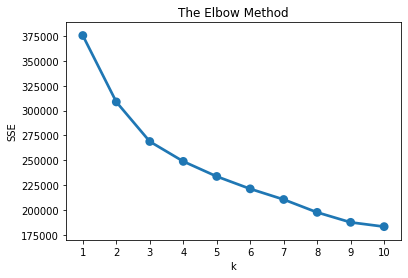

In [230]:
from sklearn. cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

sse={}
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k).fit(df_snorm)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### 3 clusters looks alright

In [235]:
# Import KMeans
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3)

# Fit k-means clustering on the normalized data set
kmeans.fit(df_snorm)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [236]:
cluster_labels

array([0, 2, 0, ..., 1, 0, 0], dtype=int32)

In [237]:
df_s_org['prediction'] = pd.Series(cluster_labels, index = df_s.index)

In [238]:
df_s_org.to_csv("customer_seg.csv", sep=",", index=True, header=True)

In [340]:
#Rest of analysis done with tableau

## Churn

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
df4 = df3.copy()
df4

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,op_sys,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
1,380374,23383224,base,none,comedy,access to exclusive content,22.9516,none,70.0,False,facebook,facebook,none,base_14_day_trial,4.7343,4.5141,2020-03,2020-03-15 15:44:35,False,0.3303,none,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,none,True
2,496617,26844789,enhanced,3,regional,replace OTT,36.0012,2,25.0,True,organic,facebook,iOS,base_14_day_trial,4.7343,4.5141,2019-12,2019-12-21 16:37:06,False,0.1101,none,14,False,0,none,none,none,True
3,356799,29417030,base,none,drama,replace OTT,20.0517,none,30.0,False,search,tv,Android,base_14_day_trial,4.7343,4.5141,2020-01,2020-02-10 16:09:32,False,0.0367,none,14,False,0,none,none,none,True
4,681701,26723159,base,4,comedy,replace OTT,22.9516,3,28.0,False,discovery,youtube,iOS,base_14_day_trial,4.7343,4.5141,2019-10,2019-10-19 12:57:07,False,0.0367,none,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,none,True
5,284782,24810928,base,none,comedy,access to exclusive content,20.0517,none,70.0,False,bing,tv,none,base_14_day_trial,4.7343,4.5141,2020-03,2020-03-17 20:15:43,False,0.3303,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,none,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,603751,25835684,base,2,drama,access to exclusive content,24.4015,2,43.0,False,email,pinterest,iOS,base_14_day_trial,4.7343,4.5141,2020-01,2020-01-15 22:43:56,False,0.0000,none,14,True,1,2020-01-15 22:43:56,2020-05-15 22:43:56,none,True
227623,509326,21434712,enhanced,3,comedy,supplement OTT,28.7514,2,38.0,False,facebook,facebook_organic,iOS,base_14_day_trial,4.7343,4.5141,2019-11,2019-12-01 14:12:33,False,0.3303,none,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,none,True
227624,229587,25843074,enhanced,2,comedy,replace OTT,27.3014,2,49.0,False,google_organic,referral,iOS,base_14_day_trial,4.7343,4.5141,2019-12,2019-12-20 18:02:13,False,0.3303,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,none,True
227625,281340,24799085,base,none,comedy,access to exclusive content,31.6513,none,45.0,False,facebook,facebook,iOS,base_14_day_trial,4.7343,4.5141,2019-12,2020-01-04 19:40:44,True,0.0367,none,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,none,True


In [268]:
del df4["Unnamed: 0"]
del df4["subid"]

In [269]:
df4 = df4.replace({'none': np.nan}, regex=True)

In [270]:
df4.isnull().sum()

package_type                     35335
num_weekly_services_utilized     74752
preferred_genre                  36081
intended_use                      3499
weekly_consumption_hour           2754
num_ideal_streaming_services     76467
age                                  0
male_TF                              4
attribution_technical                0
attribution_survey                2599
op_sys                           12975
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                             0
payment_type                    134795
num_trial_days                       0
current_sub_TF                       0
payment_period                       0
last_payment                     84232
next_payment                     86050
cancel_date                     158951
trial_completed          

In [271]:
df4 = pd.get_dummies(df4, columns=['num_weekly_services_utilized', 
                                 'preferred_genre','intended_use','num_ideal_streaming_services','op_sys'],drop_first=True)

In [272]:
df4.isnull().sum()

package_type                                 35335
weekly_consumption_hour                       2754
age                                              0
male_TF                                          4
attribution_technical                            0
attribution_survey                            2599
plan_type                                        0
monthly_price                                    0
discount_price                                   0
account_creation_date                            0
trial_end_date                                   0
initial_credit_card_declined                     0
join_fee                                         0
payment_type                                134795
num_trial_days                                   0
current_sub_TF                                   0
payment_period                                   0
last_payment                                 84232
next_payment                                 86050
cancel_date                    

In [273]:
del df4["last_payment"]
del df4["next_payment"]
del df4["cancel_date"]
del df4["payment_type"]
del df4["package_type"]

In [274]:
df4.dropna(inplace=True)
df4

,weekly_consumption_hour,age,male_TF,attribution_technical,attribution_survey,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,num_trial_days,current_sub_TF,payment_period,trial_completed,num_weekly_services_utilized_1.0,num_weekly_services_utilized_2.0,num_weekly_services_utilized_3.0,num_weekly_services_utilized_4.0,num_weekly_services_utilized_5.0,num_weekly_services_utilized_6.0,num_weekly_services_utilized_7.0,num_weekly_services_utilized_8.0,num_weekly_services_utilized_9.0,num_weekly_services_utilized_10.0,num_weekly_services_utilized_14.0,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,num_ideal_streaming_services_1.0,num_ideal_streaming_services_2.0,num_ideal_streaming_services_3.0,num_ideal_streaming_services_4.0,num_ideal_streaming_services_5.0,num_ideal_streaming_services_7.0,op_sys_iOS
1,22.951579,70.0,False,facebook,facebook,base_14_day_trial,4.7343,4.5141,2020-03,2020-03-15 15:44:35,False,0.3303,14,True,1,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36.001186,25.0,True,organic,facebook,base_14_day_trial,4.7343,4.5141,2019-12,2019-12-21 16:37:06,False,0.1101,14,False,0,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
3,20.051667,30.0,False,search,tv,base_14_day_trial,4.7343,4.5141,2020-01,2020-02-10 16:09:32,False,0.0367,14,False,0,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,22.951579,28.0,False,discovery,youtube,base_14_day_trial,4.7343,4.5141,2019-10,2019-10-19 12:57:07,False,0.0367,14,True,2,True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
5,20.051667,70.0,False,bing,tv,base_14_day_trial,4.7343,4.5141,2020-03,2020-03-17 20:15:43,False,0.3303,14,True,1,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,24.401536,43.0,False,email,pinterest,base_14_day_trial,4.7343,4.5141,2020-01,2020-01-15 22:43:56,False,0.0000,14,True,1,True,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
227623,28.751405,38.0,False,facebook,facebook_organic,base_14_day_trial,4.7343,4.5141,2019-11,2019-12-01 14:12:33,False,0.3303,14,True,1,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
227624,27.301448,49.0,False,google_organic,referral,base_14_day_trial,4.7343,4.5141,2019-12,2019-12-20 18:02:13,False,0.3303,14,True,1,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
227625,31.651317,45.0,False,facebook,facebook,base_14_day_trial,4.7343,4.5141,2019-12,2020-01-04 19:40:44,True,0.0367,14,True,1,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [275]:
df4 = pd.get_dummies(df4, columns=['male_TF','attribution_technical','attribution_survey','plan_type','initial_credit_card_declined','current_sub_TF','trial_completed'],drop_first=True)
df4

,weekly_consumption_hour,age,monthly_price,discount_price,account_creation_date,trial_end_date,join_fee,num_trial_days,payment_period,num_weekly_services_utilized_1.0,num_weekly_services_utilized_2.0,num_weekly_services_utilized_3.0,num_weekly_services_utilized_4.0,num_weekly_services_utilized_5.0,num_weekly_services_utilized_6.0,num_weekly_services_utilized_7.0,num_weekly_services_utilized_8.0,num_weekly_services_utilized_9.0,num_weekly_services_utilized_10.0,num_weekly_services_utilized_14.0,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,num_ideal_streaming_services_1.0,num_ideal_streaming_services_2.0,num_ideal_streaming_services_3.0,num_ideal_streaming_services_4.0,num_ideal_streaming_services_5.0,num_ideal_streaming_services_7.0,op_sys_iOS,male_TF_True,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,plan_type_high_14_day_trial,initial_credit_card_declined_True,current_sub_TF_True,trial_completed_True
1,22.951579,70.0,4.7343,4.5141,2020-03,2020-03-15 15:44:35,0.3303,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,36.001186,25.0,4.7343,4.5141,2019-12,2019-12-21 16:37:06,0.1101,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,20.051667,30.0,4.7343,4.5141,2020-01,2020-02-10 16:09:32,0.0367,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,22.951579,28.0,4.7343,4.5141,2019-10,2019-10-19 12:57:07,0.0367,14,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
5,20.051667,70.0,4.7343,4.5141,2020-03,2020-03-17 20:15:43,0.3303,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [277]:
df4["trial_end_date"] = pd.to_datetime(df4["trial_end_date"]).astype("int64")//1e9
df4 #Convert trial end date to epoch seconds

,weekly_consumption_hour,age,monthly_price,discount_price,account_creation_date,trial_end_date,join_fee,num_trial_days,payment_period,num_weekly_services_utilized_1.0,num_weekly_services_utilized_2.0,num_weekly_services_utilized_3.0,num_weekly_services_utilized_4.0,num_weekly_services_utilized_5.0,num_weekly_services_utilized_6.0,num_weekly_services_utilized_7.0,num_weekly_services_utilized_8.0,num_weekly_services_utilized_9.0,num_weekly_services_utilized_10.0,num_weekly_services_utilized_14.0,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,num_ideal_streaming_services_1.0,num_ideal_streaming_services_2.0,num_ideal_streaming_services_3.0,num_ideal_streaming_services_4.0,num_ideal_streaming_services_5.0,num_ideal_streaming_services_7.0,op_sys_iOS,male_TF_True,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,plan_type_high_14_day_trial,initial_credit_card_declined_True,current_sub_TF_True,trial_completed_True
1,22.951579,70.0,4.7343,4.5141,2020-03,1584287075,0.3303,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,36.001186,25.0,4.7343,4.5141,2019-12,1576946226,0.1101,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,20.051667,30.0,4.7343,4.5141,2020-01,1581350972,0.0367,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,22.951579,28.0,4.7343,4.5141,2019-10,1571489827,0.0367,14,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
5,20.051667,70.0,4.7343,4.5141,2020-03,1584476143,0.3303,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [280]:
#new customer churn
#churn 1: people who do not pay after trial payment period=0, trial completed=True
#not churn 0:people who pay for at least 1 period after trial payment completed. payment period >0,trial completed=True
df5 = df4.copy()
df5["churn_pred"] = np.where(df5["trial_completed_True"] == 1, np.where(df5["payment_period"] == 0, 1, np.where(df5["payment_period"] > 0, 0, "none")), "none")
df5 = df5[df5["churn_pred"]!="none"]

In [281]:
X = df5.copy()
Y = X['churn_pred']
del X["churn_pred"]

In [286]:
del X["trial_completed_True"]
del X["current_sub_TF_True"]
del X["payment_period"]
del X["num_trial_days"]

In [292]:
del X["account_creation_date"]

In [307]:
X.dropna(inplace=True)

In [308]:
X = X.apply(pd.to_numeric, errors='coerce')

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [316]:
train_norm = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
test_norm = (X_test - X_test.mean()) / (X_test.max() - X_test.min())

In [317]:
train_norm['churn_pred'] = pd.Series(y_train,index = train_norm.index)
test_norm['churn_pred'] = pd.Series(y_test,index = test_norm.index)

In [319]:
del train_norm["num_weekly_services_utilized_10.0"]
train_norm

,weekly_consumption_hour,age,monthly_price,discount_price,trial_end_date,join_fee,num_weekly_services_utilized_1.0,num_weekly_services_utilized_2.0,num_weekly_services_utilized_3.0,num_weekly_services_utilized_4.0,num_weekly_services_utilized_5.0,num_weekly_services_utilized_6.0,num_weekly_services_utilized_7.0,num_weekly_services_utilized_8.0,num_weekly_services_utilized_9.0,num_weekly_services_utilized_14.0,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,num_ideal_streaming_services_1.0,num_ideal_streaming_services_2.0,num_ideal_streaming_services_3.0,num_ideal_streaming_services_4.0,num_ideal_streaming_services_5.0,num_ideal_streaming_services_7.0,op_sys_iOS,male_TF_True,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,plan_type_high_14_day_trial,initial_credit_card_declined_True,churn_pred
160535,-0.030394,0.059968,-0.000513,-0.000647,0.043468,-0.158053,-0.000148,-0.144648,-0.335316,0.904108,-0.029395,-0.00533,-0.000836,-0.000096,-0.000078,-0.000009,0.797931,-0.03111,-0.018316,-0.044157,-0.023742,-0.060531,-0.065391,0.966181,-0.281099,-0.132071,-0.000488,0.432018,-0.041091,-0.000305,-0.000009,-0.000009,0.388418,-0.128579,-0.000209,-0.005914,-0.001855,-0.011009,-0.082514,-0.000017,-0.000192,-0.000819,-0.013691,-0.007177,0.89006,-0.032277,-0.326345,-0.015494,-0.051125,-0.00007,-0.00547,-0.091929,-0.009432,-0.000801,-0.030762,-0.000209,-0.000052,-0.00547,-0.000601,-0.023106,-0.000418,-0.119634,-0.000035,-0.000017,-0.001559,-0.005139,-0.00189,-0.002177,-0.48397,-0.004259,-0.035779,-0.008213,-0.0411,-0.016356,-0.032434,-0.102006,-0.045202,-0.005975,-0.020807,0.828449,-0.017471,-0.001751,-0.056316,0
126213,0.048037,-0.088680,-0.000513,-0.000647,0.268114,-0.008053,-0.000148,-0.144648,-0.335316,-0.095892,-0.029395,-0.00533,-0.000836,-0.000096,-0.000078,-0.000009,-0.202069,-0.03111,-0.018316,-0.044157,-0.023742,-0.060531,-0.065391,-0.033819,-0.281099,-0.132071,-0.000488,-0.567982,-0.041091,-0.000305,-0.000009,-0.000009,0.388418,-0.128579,-0.000209,-0.005914,-0.001855,-0.011009,-0.082514,-0.000017,-0.000192,-0.000819,-0.013691,-0.007177,-0.10994,-0.032277,-0.326345,-0.015494,-0.051125,-0.00007,-0.00547,-0.091929,-0.009432,-0.000801,-0.030762,-0.000209,-0.000052,-0.00547,-0.000601,-0.023106,-0.000418,-0.119634,-0.000035,-0.000017,-0.001559,-0.005139,-0.00189,-0.002177,-0.48397,-0.004259,-0.035779,-0.008213,-0.0411,-0.016356,-0.032434,-0.

In [320]:
del test_norm["num_weekly_services_utilized_10.0"]
test_norm

,weekly_consumption_hour,age,monthly_price,discount_price,trial_end_date,join_fee,num_weekly_services_utilized_1.0,num_weekly_services_utilized_2.0,num_weekly_services_utilized_3.0,num_weekly_services_utilized_4.0,num_weekly_services_utilized_5.0,num_weekly_services_utilized_6.0,num_weekly_services_utilized_7.0,num_weekly_services_utilized_8.0,num_weekly_services_utilized_9.0,num_weekly_services_utilized_14.0,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,num_ideal_streaming_services_1.0,num_ideal_streaming_services_2.0,num_ideal_streaming_services_3.0,num_ideal_streaming_services_4.0,num_ideal_streaming_services_5.0,num_ideal_streaming_services_7.0,op_sys_iOS,male_TF_True,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,plan_type_high_14_day_trial,initial_credit_card_declined_True,churn_pred
142299,-0.030223,-0.268073,-0.000638,-0.000796,0.413249,-0.008649,-0.000041,-0.145139,0.666477,-0.099537,-0.029853,-0.005568,-0.000772,-0.000203,-0.00002,NaN,-0.200374,-0.031316,-0.018351,-0.04353,-0.023512,-0.06058,-0.066371,-0.032962,-0.279548,0.865164,-0.000366,0.428914,-0.041619,-0.000142,-0.000061,NaN,-0.605654,-0.128556,-0.000305,-0.005609,0.99813,-0.011401,-0.083868,-0.000041,-0.000224,-0.000549,-0.013514,-0.007539,-0.109759,-0.033551,-0.325272,-0.016318,-0.051699,-0.000264,-0.0063,-0.089518,-0.009531,-0.000975,-0.030889,-0.000122,-0.000041,-0.005121,-0.000467,-0.022679,-0.000386,-0.119533,NaN,-0.00002,-0.001605,-0.005324,-0.001687,-0.001931,-0.484799,-0.004024,-0.035319,0.991587,-0.042209,-0.017497,-0.032027,-0.100045,-0.045907,-0.006605,-0.021135,-0.171131,-0.01707,-0.002032,-0.057877,0
83003,0.123623,-0.244263,-0.000638,-0.000796,0.216170,-0.008649,-0.000041,-0.145139,0.666477,-0.099537,-0.029853,-0.005568,-0.000772,-0.000203,-0.00002,NaN,-0.200374,-0.031316,-0.018351,-0.04353,-0.023512,-0.06058,-0.066371,-0.032962,-0.279548,0.865164,-0.000366,0.428914,-0.041619,-0.000142,-0.000061,NaN,-0.605654,0.871444,-0.000305,-0.005609,-0.00187,-0.011401,-0.083868,-0.000041,-0.000224,-0.000549,-0.013514,-0.007539,-0.109759,-0.033551,0.674728,-0.016318,-0.051699,-0.000264,-0.0063,-0.089518,-0.009531,-0.000975,-0.030889,-0.000122,-0.000041,-0.005121,-0.000467,-0.022679,-0.000386,-0.119533,NaN,-0.00002,-0.001605,-0.005324,-0.001687,-0.001931,0.515201,-0.004024,-0.035319,-0.008413,-0.042209,-0.017497,-0.032027,-0.100045,-0.045907,-0.006605,-0.0211

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = train_norm.drop(columns=["churn_pred"])
y = train_norm.churn_pred
logistic_regression = LogisticRegression(max_iter = 10000)
logistic_regression.fit(x, y)

LogisticRegression(max_iter=10000)

In [334]:
test_x = test_norm.drop(columns=["churn_pred"])
test_x = test_x.fillna(0)
probability = logistic_regression.predict_proba(test_x)[:, 1]
pred_y = logistic_regression.predict(test_x)
pred_y

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

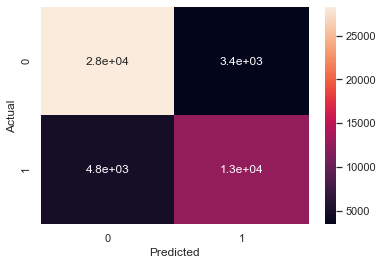

Logistic ROC AUC:    0.89092
Accuracy:            0.83167
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     31721
           1       0.79      0.72      0.75     17487

    accuracy                           0.83     49208
   macro avg       0.82      0.81      0.81     49208
weighted avg       0.83      0.83      0.83     49208



In [337]:
import sklearn
import numpy as np
from sklearn import metrics, preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, recall_score, classification_report
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

test_y = test_norm["churn_pred"]

confusion_matrix = pd.crosstab(test_y, pred_y, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

log_reg_auc = roc_auc_score(test_y, probability)

print('Logistic ROC AUC:    %.5f' % (log_reg_auc))
print('Accuracy:            %.5f' % (accuracy_score(test_y, pred_y)))
print(classification_report(test_y, pred_y))

In [339]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_norm["churn_pred"], pred_y)
cm

array([[28278,  3443],
       [ 4840, 12647]])

In [341]:
# Insights continued on powerpoint